<a href="https://colab.research.google.com/github/fasthill/My-gist/blob/main/eda-plot/Titanic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mostly from https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
train_df = pd.read_csv('https://raw.githubusercontent.com/fasthill/My-gist/main/data/titanic/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/fasthill/My-gist/main/data/titanic/test.csv')

In [3]:
combine = [train_df, test_df]

In [4]:
columns = train_df.columns.values

In [5]:
print(columns)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#### Data

train.csv (data for a subset of the passengers including outcomes (survived or perished)) <br>
test.csv (data for a subset of passengers without outcomes)

##### Data description:
1. Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
2. Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. Name - Name
4. Sex - Sex
5. Age - Age
6. Sibsp - Number of Siblings/Spouses Aboard
7. Parch - Number of Parents/Children Aboard
8. Ticket - Ticket Number
9. Fare - Passenger Fare
10. Cabin - Cabin
11. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Analyze by describing data
1. Which features are <font color='red'>categorical</font>? <br> ⦁ Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
<br>
<br>
2. Which features are <font color='red'>numerical</font>? <br> ⦁ Continous: Age, Fare. Discrete: SibSp, Parch.

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Which features are <font color='red'>mixed data </font>types?  Numerical, alphanumeric data within same feature. <br>
⦁ Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.
<br>
<br>
2. Which features may contain <font color='red'>errors or typos</font>?
This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting. <br> 
⦁  Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.
<br>
<br>
3. Which features contain <font color='red'>blank, null or empty</font> values? These will require correcting. <br> ⦁ Cabin > Age > Embarked features contain a number of null values in that order for the training dataset. <br> 
⦁ Cabin > Age are incomplete in case of test dataset.
<br>
<br>
4. What are the <font color='red'>data types</font> for various features? Helping us during converting goal. <br> 
⦁ Seven features are integer or floats. Six in case of test dataset. <br> 
⦁ Five features are strings (object).

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [9]:
test_df.info() # train_df의 1.survieved 가 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_df['Parch'].describe(percentiles=[0.75, 0.8])

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
50%        0.000000
75%        0.000000
80%        1.000000
max        6.000000
Name: Parch, dtype: float64

In [12]:
train_df[['Age', 'Fare']].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
10%,14.000000,7.550000
20%,19.000000,7.854200
30%,22.000000,8.050000
40%,25.000000,10.500000
50%,28.000000,14.454200
60%,31.800000,21.679200


In [13]:
train_df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [14]:
train_df[train_df['Ticket']=='1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [15]:
train_df['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

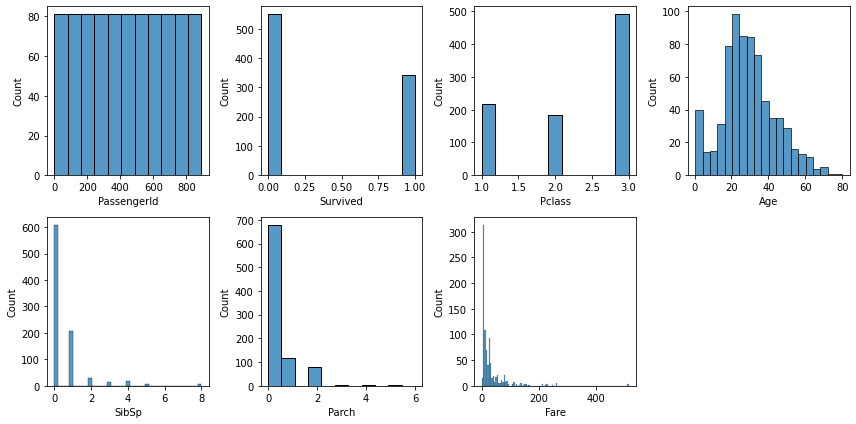

In [16]:
def plt_hist(df):
    num_h = 4
    length = len(df.columns)
    num_v = int(length / 4 + 0.5)
    plt.figure(figsize=(3*num_h,3*num_v))
    for i in range(1, length+1):
        plt.subplot(num_v,num_h,i)
        sns.histplot(df.iloc[:,i-1])
    plt.tight_layout()
    plt.show()

# columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch' ,'Fare']
columns = train_df.select_dtypes('number').columns
plt_hist(train_df[columns])

In [17]:
train_df.select_dtypes('number').columns  # select columns which have numerical data only

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [18]:
train_df.select_dtypes('object').columns # select columns which have non-numerical data

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [19]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### Assumtions based on data analysis
1. Correcting.

* <font color='red'>Ticket feature</font> may be dropped from our analysis as it contains <font color='red'>high ratio of duplicates (22%)</font> and there may not be a correlation between Ticket and survival.<br>
* <font color='red'>Cabin feature</font> may be dropped as it is <font color='red'>highly incomplete</font> or contains <font color='red'>many null values</font> both in training and test dataset.<br>
* <font color='red'>PassengerId</font> may be dropped from training dataset as it does not contribute to survival.<br>
* <font color='red'>Name feature</font> is relatively non-standard, may not contribute directly to survival, so maybe dropped.


2. Creating.

* We may want to <font color='red'>create a new feature called Family</font> based on Parch and SibSp <font color='red'>to get total count of family members</font> on board.
* We may want to engineer the <font color='red'>Name feature</font> to extract <font color='red'> Title as a new feature</font>.
* We may want to create <font color='red'>new feature for Age bands</font>. This turns a continous numerical feature into an ordinal categorical feature.
* We may also want to create a <font color='red'>Fare range feature</font> if it helps our analysis.

3. Classifying.

* We may also add to <font color='blue'>our assumptions</font> based on the problem description noted earlier.

* <font color='red'>Women (Sex=female)</font> were more likely to have survived.
* <font color='red'>Children (Age<?)</font> were more likely to have survived.
* <font color='red'>The upper-class passengers (Pclass=1)</font> were more likely to have survived.

#### Analyze by pivoting features
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. 

We can only do so at this stage for features which do not have any empty values. 

It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

* Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
* Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
* SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [20]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [21]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [23]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [24]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Pclass                                                      
1         216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0
2         184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0
3         491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0

In [25]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).groups

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 

#### Analyze by visualizing data
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

Correlating numerical features¶
Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

##### Observations.

* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.

##### Decisions.

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

* We should consider Age (our assumption classifying #2) in our model training.
* Complete the Age feature for null values (completing #1).
* We should band age groups (creating #3).

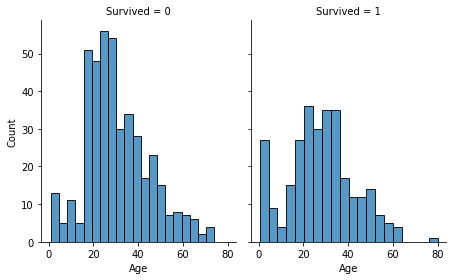

In [26]:
g = sns.FacetGrid(train_df, col='Survived', height=4, aspect=0.8)  # train_df에서 Survived column을 세로축으로 지정
g.map(sns.histplot, 'Age', bins=20) # # train_df에서 Age column을 가로축으로 지정

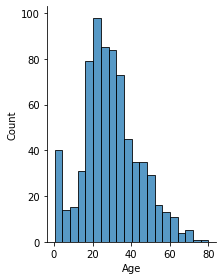

In [27]:
g = sns.FacetGrid(train_df, height=4, aspect=0.8)  # train_df에서 Survived column을 세로축으로 지정
g.map(sns.histplot, 'Age', bins=20) # # train_df에서 Age column을 가로축으로 지정

#### Correlating numerical and ordinal features
We can combine multiple features for identifying correlating usng single plot. This can be done with numerical and categorical features which have numeric values.

##### Observatins.
* Pclass=3 had most passengers, howeber most did not survive. Confirms our classfying assumption #2.
* Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2
* Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
* Pclass varies in terms of Age distribution of passengers

##### Decisions.
* Consider Pclass for model training

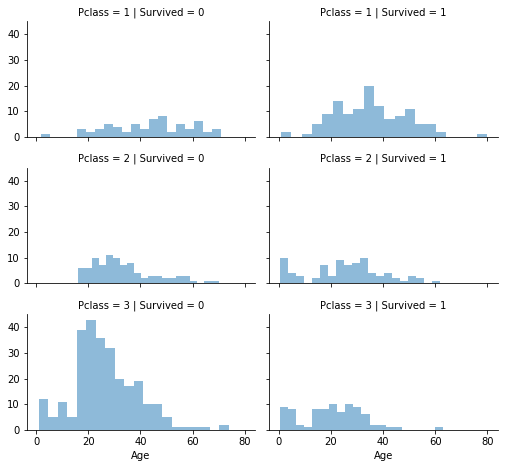

In [28]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6) # col:그림에서 column축으로 전개, row: 가로축으로 전개
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
# grid.map(sns.histplot, 'Age', alpha=0.5, bins=20)
grid.add_legend()

#### Correlating categorical features
Now we can correlate categorical features with our solution goal.

##### Observations
* Female passengers had much better survived rate than males. Confirms classifying (#1).
* Exception in Embakred=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessariy direct correlation between Embarked and Survived.
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

##### Decisions.

* Add Sex feature to model training.
* Complete and add Embarked feature to model training.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


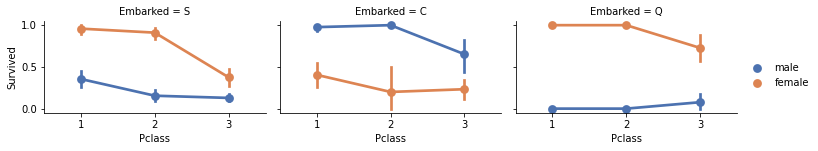

In [29]:
# grid = sns.FacetGrid(train_df, row='Embarked')
grid = sns.FacetGrid(train_df, col='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')  # X축 Pclass, y축 Survived
# grid.map(sns.pointplot, 'Survived', 'Pclass', 'Sex', palette='deep')
grid.add_legend() 

#### Correlating categorical and numerical features
We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

##### Observations.
* Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
* Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

##### Decisions.
* Consider banding Fare feature.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


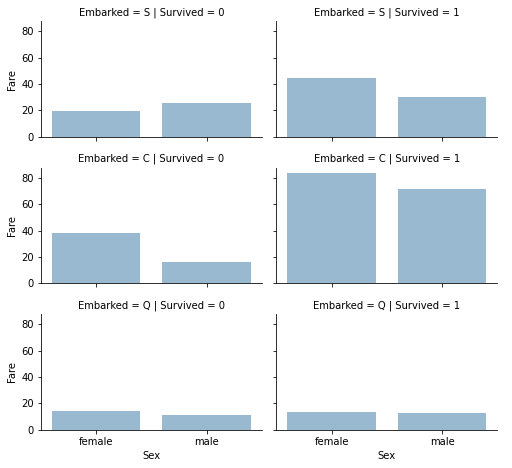

In [30]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

#### Wrangle data
(data wrangling : Data wrangling can be defined as the process of cleaning, organizing, and transforming raw data into the desired format for analysts to use for prompt decision-making. Also known as data cleaning or data munging)

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

##### Correcting by dropping features
This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [31]:
print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)


In [32]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1) # should include axis=1
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

In [33]:
combine = [train_df, test_df]

In [34]:
print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

After (891, 10) (418, 9) (891, 10) (418, 9)


#### Creating new feature extracting from existing
We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

##### Observations.

When we plot Title, Age, and Survived, we note the following observations.

* Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
* Survival among Title Age bands varies slightly.
* Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

##### Decision.

* We decide to retain the new Title feature for model training.

In [35]:
for dataset in combine:
  dataset['Title'] = dataset['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)

In [36]:
title_survived_df = pd.crosstab(train_df['Title'],  train_df['Survived'])
title_sex_df = pd.crosstab(train_df['Title'],  train_df['Sex'])

In [37]:
merge_df = pd.merge(left=title_survived_df.reset_index(), right=title_sex_df.reset_index(), on='Title')
merge_df.head()

,Title,0,1,female,male
0,Capt,1,0,0,1
1,Col,1,1,0,2
2,Countess,0,1,1,0
3,Don,1,0,0,1
4,Dr,4,3,1,6


We can replace many titles with a more common name or classify them as Rare.

In [38]:
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 
                                               'Rare', regex=True)
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss', regex=True) # without regex argument, it only tries to find the sentence 'Mlle' with nothing before or after.
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss', regex=True)
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs', regex=True)

In [39]:
train_df[['Title', 'Survived']].groupby('Title').mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


We can convert the categorical titles to ordinal.

In [40]:
title_mapping = {'Mr' : 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)

In [41]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [42]:
train_df.drop(['PassengerId', 'Name'], axis=1, inplace=True)
test_df.drop(['Name'], axis=1, inplace=True)
combine = [train_df, test_df]

In [43]:
train_df.shape, test_df.shape

((891, 9), (418, 9))

#### Converting a categorical feature
Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [44]:
for dataset in combine:
  dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [45]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


#### Completing a numerical continuous feature
Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and standard deviation.

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

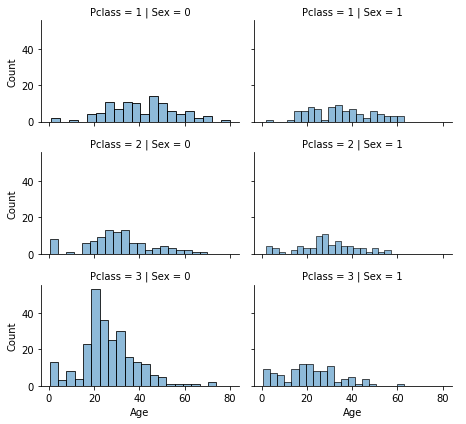

In [46]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2, aspect=1.6)
grid.map(sns.histplot, 'Age', alpha=0.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [47]:
# Pclass와 Sex를 기준으로 나이 추산하기.
def cal_median_mean_std_of_pclass_sex(df, feature_name='Age'):
  df = df[~df[feature_name].isna()]
  pclass_sex_median = np.zeros([3,2]) # row: pclass(1~3), col: sex(0~1), median
  pclass_sex_mean = np.zeros([3,2]) # row: pclass(1~3), col: sex(0~1), mean
  pclass_sex_std = np.zeros([3,2]) # row: pclass(1~3), col: sex(0~1), std
  pclass = [1, 2, 3]
  sex = [0, 1]
  for idx_p, val_p in enumerate(pclass):
      for idx_s, val_s in enumerate(sex):
          ps_median = df[feature_name][(df['Pclass']==val_p) & (df['Sex']==val_s)].median()
          ps_mean = df[feature_name][(df['Pclass']==val_p) & (df['Sex']==val_s)].mean()
          ps_std = df[feature_name][(df['Pclass']==val_p) & (df['Sex']==val_s)].std()
          pclass_sex_median[idx_p, idx_s] = ps_median
          pclass_sex_mean[idx_p, idx_s] = ps_mean
          pclass_sex_std[idx_p, idx_s] = ps_std
  return pclass_sex_median, pclass_sex_mean, pclass_sex_std

# 평균과 std를 이용하여 random값 생성하기
def gen_num(mean, std):
  return (mean + std * np.random.randn(1))[0]

pclass_sex_median, pclass_sex_mean, pclass_sex_std = cal_median_mean_std_of_pclass_sex(train_df, 'Age')

In [48]:
nan_index = train_df[train_df['Age'].isna()].index
nan_index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [49]:
New_age = pd.Series([], dtype=int) # 빈 리스트
for i in range(len(train_df)):
  if np.isnan(train_df['Age'][i]):
    New_age[i] = int(pclass_sex_median[train_df['Pclass'][i]-1, train_df['Sex'][i]] + 0.5)
  else:
    New_age[i] = int(train_df['Age'][i])

아래 내용은 age 산출방식과 새로운 column 삽입시 이용.
kaggle  예에서는 사용하지 않음.
```
train_df['Wrangled_Age'] = New_age # New_age series를 df에 삽입하기
new_col_name = ['Survived', 'Pclass', 'Sex', 'Age', 'Wrangled_Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']  # column 순서 재정리
train_df = train_df[new_col_name]
train_df.head()
```

In [50]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [51]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let us create Age bands and determine correlations with Survived.

In [52]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [53]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


We can not remove the AgeBand feature.

In [54]:
train_df =  train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


#### Create new feature combining existing features
We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [55]:
for dataset in combine:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [56]:
train_df[['FamilySize', 'Survived']].groupby(by='FamilySize', as_index=False).mean().sort_values(by = 'Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [57]:
for dataset in combine:
  dataset['IsAlone'] = 0
  dataset.loc[dataset['FamilySize']==1, 'IsAlone'] = 1

In [58]:
train_df[['IsAlone', 'Survived']].groupby(by='IsAlone', as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [59]:
for dataset in combine:
  dataset.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, inplace=True)

In [60]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [61]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,Q,1.0,1
1,893,3,1,2,7.0000,S,3.0,0
2,894,2,0,3,9.6875,Q,1.0,1
3,895,3,0,1,8.6625,S,1.0,1
4,896,3,1,1,12.2875,S,3.0,0


We can also create an artificial feature combining Pclass and Age. <font color='red'>need know why? </font>

In [62]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

In [63]:
train_df[['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


#### Completing a categorical feature
Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [64]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

최빈값 구하는 다른 방법
```
train_df['Embarked'].value_counts().index[0]
train_df['Embarked'].describe().top
```

In [65]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [66]:
train_df[['Embarked', 'Survived']].groupby(by='Embarked').mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


##### Converting categorical feature to numeric
We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [67]:
map_dict = { 'S' : 0, 'C': 1, 'Q': 2 }
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( map_dict ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


#### Quick completing and converting a numeric feature
We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [68]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)  # == test_df['Fare'].dropna().median()

In [69]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1.0,1,6
1,893,3,1,2,7.0000,0,3.0,0,6
2,894,2,0,3,9.6875,2,1.0,1,6
3,895,3,0,1,8.6625,0,1.0,1,3
4,896,3,1,1,12.2875,0,3.0,0,3


We can not create FareBand.

In [70]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [71]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

 위 코드는 다음과 같이 labels parameter를 사용하여 똑 같이 출력할 수 있음.
 ```
for dataset in combine:
    dataset['Fare'] = pd.qcut(dataset['Fare'], 4, labels=[0, 1, 2, 3])

combine = [train_df, test_df]
 ```

In [72]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [73]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1.0,1,6
1,893,3,1,2,0,0,3.0,0,6
2,894,2,0,3,1,2,1.0,1,6
3,895,3,0,1,1,0,1.0,1,3
4,896,3,1,1,1,0,3.0,0,3
5,897,3,0,0,1,0,1.0,1,0
6,898,3,1,1,0,2,2.0,1,3
7,899,2,0,1,2,0,1.0,0,2
8,900,3,1,1,0,1,3.0,1,3
9,901,3,0,1,2,0,1.0,0,3


#### Model, predict and solve
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest
* Perceptron
* Artificial neural network
* RVM or Relevance Vector Machine

#### Prepare train, test sets

In [74]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop(['PassengerId'], axis=1).copy()

In [75]:
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference Wikipedia.

Note the confidence score generated by the model based on our training dataset.

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [78]:
y_pred = logreg.predict(X_test)

In [79]:
logreg_score = logreg.score(X_train, y_train)
logreg_score 

0.813692480359147

In [80]:
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

81.37

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
Inversely as Pclass increases, probability of Survived=1 decreases the most.
This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
So is Title as second highest positive correlation.

In [81]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201057
5,Title,0.406027
4,Embarked,0.276628
6,IsAlone,0.185986
7,Age*Class,-0.050260
3,Fare,-0.071665
2,Age,-0.469638
0,Pclass,-1.200309


Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference Wikipedia.

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [82]:
from sklearn.svm import SVC

In [83]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [84]:
svc_score = svc.score(X_train, y_train)
svc_score

0.8282828282828283

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference Wikipedia.

KNN confidence score is better than Logistics Regression but worse than SVM.

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [87]:
knn_score = knn.score(X_train, y_train)
knn_score

0.8406285072951739

In [88]:
knn.predict_proba(X_train)

array([[0.75, 0.25],
       [0.  , 1.  ],
       [0.25, 0.75],
       ...,
       [1.  , 0.  ],
       [0.5 , 0.5 ],
       [1.  , 0.  ]])

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference Wikipedia.

The model generated confidence score is the lowest among the models evaluated so far.

In [89]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [90]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [91]:
gnb_score = gnb.score(X_train, y_train)
gnb_score

0.7687991021324355

In [92]:
gnb = CategoricalNB()
gnb.fit(X_train, y_train)

CategoricalNB()

In [93]:
gnb.score(X_train, y_train)

0.7676767676767676

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference Wikipedia.

In [94]:
from sklearn.linear_model import Perceptron

In [95]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
preceptron_score = perceptron.score(X_train, y_train)
preceptron_score

0.7934904601571269

In [96]:
from sklearn.svm import LinearSVC

In [97]:
lsvc = LinearSVC(max_iter=3000)
lsvc.fit(X_train, y_train)
linear_svc_score = lsvc.score(X_train, y_train)
linear_svc_score 

0.7946127946127947

In [98]:
lsvc.coef_

array([[-0.43531441,  0.86252697, -0.21470741, -0.02902093,  0.08930977,
         0.14741615,  0.06902626,  0.01824288]])

In [99]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_score = sgd.score(X_train, y_train)
sgd_score

0.6745230078563412

In [100]:
sgd.coef_

array([[-1.89836171,  5.88492131, -1.3288532 , -0.37967234,  1.3288532 ,
         1.89836171,  0.75934469, -0.37967234]])

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference Wikipedia.

The model confidence score is the highest among models evaluated so far.

In [101]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
decision_tree_classifier_score = dtc.score(X_train, y_train)
decision_tree_classifier_score

0.8664421997755332

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference Wikipedia.

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [102]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
randomforest_classifier_score = randomforest.score(X_train, y_train)
randomforest_classifier_score

0.8664421997755332

Now, we get the best prediction value from Random Forest method

In [103]:
y_pred = randomforest.predict(X_test)

#### Model evaluation
We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [104]:
model =  ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Naive Bayes', 'Perceptron', 
          'Linear SVC', 'Stochastic Gradient Decent', 'Decision Tree', 'Random Forest' ]

In [105]:
score = [logreg_score , svc_score, knn_score, gnb_score, preceptron_score, linear_svc_score, sgd_score, 
         decision_tree_classifier_score, randomforest_classifier_score]
score = [round(x*100, 2) for x in score]
score

[81.37, 82.83, 84.06, 76.88, 79.35, 79.46, 67.45, 86.64, 86.64]

In [106]:
models = pd.DataFrame({'Model': model, 'Score': score})

In [107]:
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Decision Tree,86.64
8,Random Forest,86.64
2,KNN,84.06
1,Support Vector Machines,82.83
0,Logistic Regression,81.37
5,Linear SVC,79.46
4,Perceptron,79.35
3,Naive Bayes,76.88
6,Stochastic Gradient Decent,67.45


In [108]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred
    })

In [109]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Our submission to the competition site Kaggle results in scoring 3,883 of 6,082 competition entries. This result is indicative while the competition is running. This result only accounts for part of the submission dataset. Not bad for our first attempt. Any suggestions to improve our score are most welcome.